In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

Returns the first 10 rows of the dataframe

In [ ]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


Remove rows or columns by specifying corresponding axis

In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

Return a random sample of items from an axis of object.

In [ ]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4770,615,Spain,Male,19,5,0.00,2,1,0,159920.92,0
6144,693,Spain,Female,46,3,151709.33,1,1,0,180736.24,0
5620,553,France,Male,31,6,0.00,2,0,0,124596.63,0
5370,682,France,Male,41,6,0.00,2,0,1,134158.09,1
8453,567,France,Female,41,9,137891.35,1,1,0,142009.46,1


In [ ]:
df['Geography'].nunique()

3

In [ ]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

Return the dtypes in the DataFrame. This returns a Series with the data type of each column.

In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df[df.Exited==1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,0,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,0,42,3,152039.70,1,1,1,53445.17,1
9982,655,Germany,1,46,7,137145.12,1,1,0,115146.40,1
9991,597,France,1,53,4,88381.21,1,1,0,69384.71,1
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1


In [ ]:
df1 = pd.get_dummies(data=df, columns=['Geography'])

In [ ]:
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5213,752,0,29,4,129514.99,1,1,1,102930.46,0,0,1,0
2239,493,1,31,3,0.00,1,1,1,176570.28,1,1,0,0
8665,821,1,40,1,0.00,2,1,0,194273.12,0,1,0,0
6025,601,1,46,3,98202.76,1,0,0,137763.93,0,1,0,0
664,661,1,41,1,0.00,2,0,1,131300.68,0,1,0,0
7999,826,0,26,5,142662.68,1,0,0,60285.30,0,1,0,0
1861,565,1,38,2,158651.29,2,1,1,179445.28,0,0,1,0
9632,760,1,34,6,58003.41,1,1,0,90346.10,0,0,1,0
4155,587,0,41,8,85109.21,1,1,0,1557.82,0,0,0,1
6433,415,0,53,5,167259.44,1,1,1,22357.25,0,0,0,1


In [ ]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

Plotting tenure with No. of customers

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


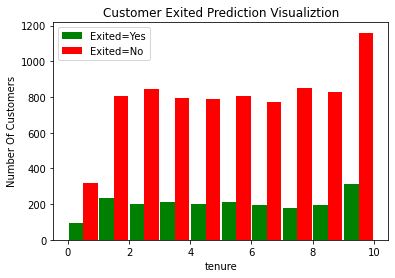

In [ ]:
exited_no = df1[df1.Exited==0].Tenure
exited_yes = df1[df1.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")

plt.hist([exited_yes,exited_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

Plotting Age and No. of customers

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


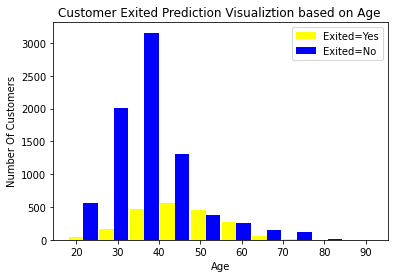

In [ ]:
exited_no = df1[df1.Exited==0].Age
exited_yes = df1[df1.Exited==1].Age

plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion based on Age ")

plt.hist([exited_yes,exited_no], rwidth=0.95, color=['yellow','blue'],label=['Exited=Yes','Exited=No'])
plt.legend()

Plotting number of Products and Customers

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


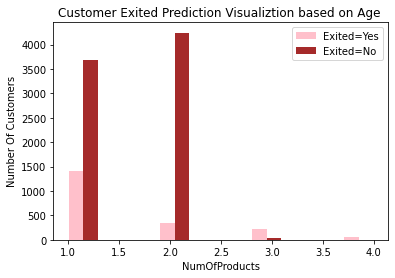

In [ ]:
exited_no = df1[df1.Exited==0].NumOfProducts
exited_yes = df1[df1.Exited==1].NumOfProducts

plt.xlabel("NumOfProducts")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion based on Age ")

plt.hist([exited_yes,exited_no], rwidth=0.95, color=['pink','brown'],label=['Exited=Yes','Exited=No'])
plt.legend()

In [ ]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [ ]:
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
3705,0.524,1,0.229730,0.3,0.000000,0.000000,1,1,0.240509,0,1,0,0
176,0.320,1,0.162162,0.0,0.000000,0.333333,1,1,0.652772,0,1,0,0
1334,0.278,0,0.135135,0.1,0.316706,0.333333,1,1,0.839890,0,0,1,0
7563,0.518,0,0.472973,0.7,0.000000,0.333333,0,1,0.261631,0,1,0,0
9461,0.694,0,0.297297,0.4,0.000000,0.333333,0,1,0.132671,0,1,0,0
2894,0.362,0,0.175676,0.3,0.000000,0.000000,1,1,0.212909,0,1,0,0
4415,0.828,1,0.081081,0.0,0.000000,0.333333,1,0,0.443607,0,1,0,0
5376,1.000,0,0.270270,0.1,0.583281,0.000000,0,1,0.519502,0,0,0,1
9378,0.718,1,0.229730,0.1,0.445708,0.333333,1,0,0.063322,0,0,0,1
3137,0.628,0,0.405405,1.0,0.000000,0.000000,1,0,0.700875,1,1,0,0


Returns dataframe size

In [ ]:
df1.shape

(10000, 13)

In [ ]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape

(8000, 12)

In [ ]:
X_test.shape

(2000, 12)

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(12, input_shape = (12,), activation = 'relu'),
        keras.layers.Dense(12, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')]) 


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
250/250 [==============================] - 3s 3ms/step - loss: 0.5459 - accuracy: 0.7703
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4729 - accuracy: 0.7972
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4572 - accuracy: 0.8036
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4476 - accuracy: 0.8067
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4395 - accuracy: 0.8124
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4352 - accuracy: 0.8131
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4315 - accuracy: 0.8135
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4292 - accuracy: 0.8139
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4277 - accuracy: 0.8156
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4263 - accura

In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 4ms/step - loss: 0.3502 - accuracy: 0.8475


[0.350205659866333, 0.8475000262260437]

In [ ]:
yp = model.predict(X_test)
yp[:5]

array([[0.03539732],
       [0.07547677],
       [0.10016283],
       [0.11105984],
       [0.07994536]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.68      0.47      0.56       405

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

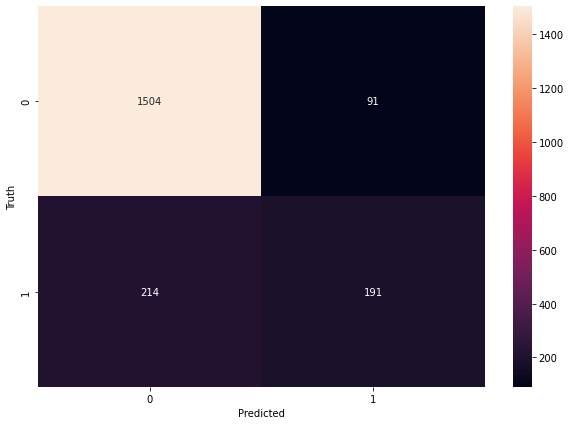

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
round((1504+191)/(1504+191+91+214),2)

0.85

Precision for customers who did not churn

In [ ]:
round(1504/(1504+191),2)

0.89

Precision for customers who actually churned

In [ ]:
round(191/(191+91),2)

0.68

In [ ]:
round(1504/(1504+91),2)

0.94

In [ ]:
round(191/(214+191),2)

0.47